[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



Categorical: Car Brand.

Quantitavtive: Weight.

Discrete: Number of students in our classroom.

Continuous: Time to finish this homework.

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions.

Text(0.5, 1.0, 'CO2 Emissions')

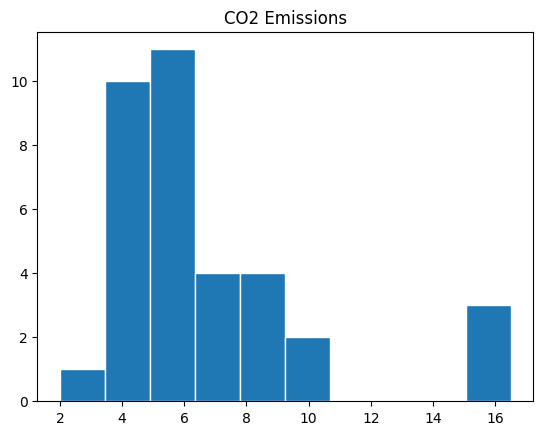

In [26]:
plt.hist(carbon_west["CO2"], edgecolor="White", bins=10)
plt.title("CO2 Emissions")

Part b. Find the mean, median, and standard deviation.

In [27]:
carbon_mean = carbon_west["CO2"].mean()
carbon_median = carbon_west["CO2"].median()
carbon_std_dev = carbon_west["CO2"].std()

print(f"Mean: {carbon_mean}")
print(f"Median: {carbon_median}")
print(f"Standard deviation: {carbon_std_dev}")

Mean: 6.717142857142858
Median: 5.9
Standard deviation: 3.3569493954627134


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [34]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")


Part a. Find the mean and standard deviation for murders without D.C.

In [35]:
murders_nodc = murders.drop(index=50)

In [47]:
murders_nodc_mean = murders_nodc["murder"].mean()
murders_nodc_std_dev = murders_nodc["murder"].std()
murders_nodc_median = murders_nodc["murder"].median()

print(f"Mean without DC: {murders_nodc_mean}")
print(f"Standar deviation without DC: {murders_nodc_std_dev}")
print(f"Median without DC {murders_nodc_median}")

Mean without DC: 4.874
Standar deviation without DC: 2.586291174793806
Median without DC 4.85


Part b. Find the five-number  summary without D.C.

In [52]:
summary_nodc = murders_nodc.describe()
print(f"Five number summary without DC:\n\n{summary_nodc.tail(5)}")

Five number summary without DC:

     murder
min   1.000
25%   2.625
50%   4.850
75%   6.175
max  12.400


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [59]:
murders_mean = murders["murder"].mean()
murders_std_dev = murders["murder"].std()
murders_median = murders["murder"].median()

print(f"Mean with DC: {murders_mean}")
print(f"Mean  no  DC: {murders_nodc_mean}\n")

print(f"Standar deviation with DC: {murders_std_dev}")
print(f"Standar deviation  no  DC: {murders_nodc_std_dev}\n")

print(f"Median with DC {murders_median}")
print(f"Median  no  DC {murders_nodc_median}\n")

summary = murders.describe()

print(f"With DC\n {summary.tail(5)}\n")
print(f"No   DC\n{summary_nodc.tail(5)}")

print("The DC outlier affects differently our data. In the mean and median there are \n small differences. The mean is affected more than the median with the \n median having a .15 raise and the mean having a 0.38 increase, thus \n the mean is affected more than the median. Between the IQR and the range\n the range is greately affected by this outlier while the IQR without and with DC only suffers a \n .25 difference while the range has a difference of 10 therefore the range is affected more than the IQR.\n In summary mean and range are affected the most with the outlier.")

Mean with DC: 5.252941176470588
Mean  no  DC: 4.874

Standar deviation with DC: 3.7253914125190373
Standar deviation  no  DC: 2.586291174793806

Median with DC 5.0
Median  no  DC 4.85

With DC
      murder
min    1.00
25%    2.65
50%    5.00
75%    6.45
max   24.20

No   DC
     murder
min   1.000
25%   2.625
50%   4.850
75%   6.175
max  12.400
The DC outlier affects differently our data. In the mean and median there are 
 small differences. The mean is affected more than the median with the 
 median having a .15 raise and the mean having a 0.38 increase, thus 
 the mean is affected more than the median. Between the IQR and the range
 the range is greately affected by this outlier while the IQR without and with DC only suffers a 
 .25 difference while the range has a difference of 10 therefore the range is affected more than the IQR.
 In summary mean and range are affected the most with the outlier.


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [60]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home.

Text(0, 0.5, 'Price in the thousands')

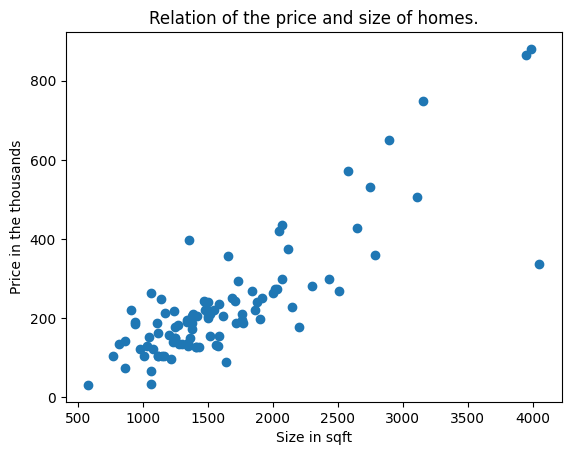

In [68]:
plt.scatter(houses['size'], houses['price'])
plt.title('Relation of the price and size of homes.')
plt.xlabel("Size in sqft")
plt.ylabel("Price in the thousands")


Part b. Find the correlation between the two variables.

In [69]:
correlation = houses["size"].corr(houses["price"])
print(correlation)

0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

0.8337847885586537


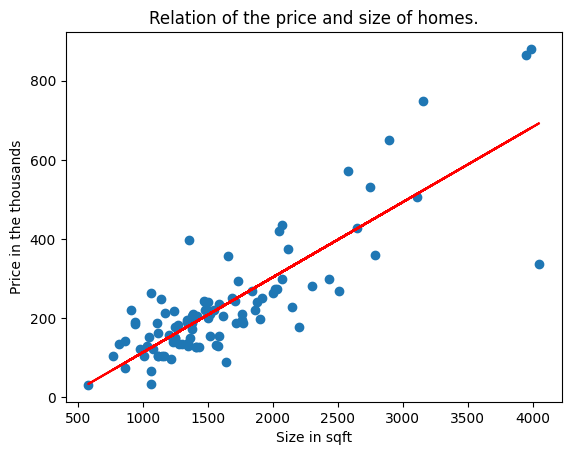

In [76]:
plt.scatter(houses['size'], houses['price'])
plt.title('Relation of the price and size of homes.')
plt.xlabel("Size in sqft")
plt.ylabel("Price in the thousands")

x = houses[["size"]]
y = houses["price"]

reg = LinearRegression()
reg.fit(x,y)

reg_line = reg.predict(x)
plt.plot(houses['size'], reg_line, color='red')

print(correlation)


Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

Text(0.5, 0, 'Prices in the thousands')

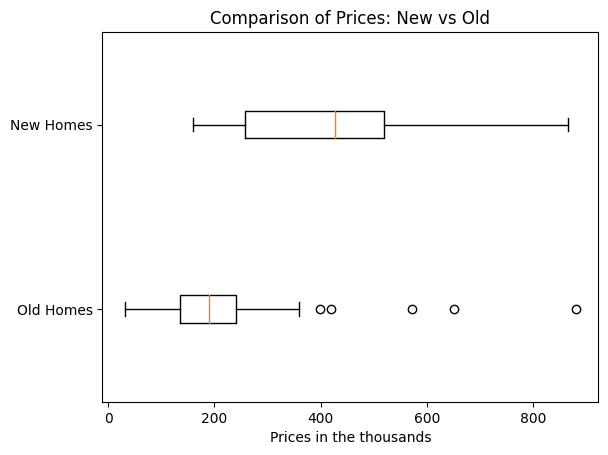

In [90]:
new_homes = houses.loc[houses['new'] == 1]
old_homes = houses.loc[houses['new'] == 0]

new_old_price = [old_homes['price'], new_homes['price']]

plt.boxplot(new_old_price, labels=['Old Homes', 'New Homes'], vert=False)
plt.title("Comparison of Prices: New vs Old")
plt.xlabel("Prices in the thousands")

Text(0, 0.5, 'Price in the thousands')

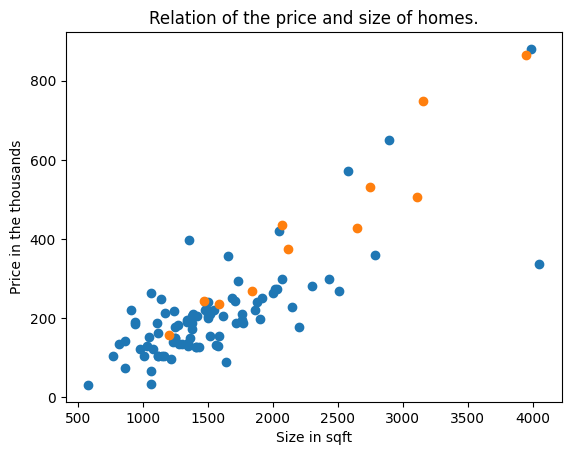

In [88]:
plt.scatter(old_homes['size'], old_homes['price'])
plt.scatter(new_homes['size'], new_homes['price'])
plt.title('Relation of the price and size of homes.')
plt.xlabel("Size in sqft")
plt.ylabel("Price in the thousands")


Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

There is a strong correlation between the size of a home to its price. The correlation was very strong. Usually we look that it is greater than 0.5 and the correlation shown is 0.83 so much more than that. In the graphs is also very clear the upwards tendency of higher the size higher the price. In relation with a home is new or not, what can be appreciated is that overall the new homes had a bigger starting price even with the same sqft this could be many different factors and specially with such low number of new homes in our data is hard to say what is the real implications, but from the plots and graphs the newer homes have a higher price in average, and a higher starting price as well. We also see that the biggest 2 homes of the old houses have either the same price as the new home or half creating the possibility of one of them being an outlier.

There is a relation between the price and the size, and also the starting price of a home is more than a home that is not new.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [91]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", sep="\\s+")

In [93]:
cont_table = pd.crosstab(happy["marital"], happy["happiness"])
cont_table

happiness,1,2,3
marital,,,
1,432,504,61
2,92,282,103
3,124,409,135
